In [3]:
from bs4 import BeautifulSoup, NavigableString, Tag
from datascience import *
from collections import Counter

## Initial Dataset/Table
Below is the table that we were able to creating by scraping information from the IMSDb (Internet Movie Script Database). For each movie on the site, it contains a file paths and appropriate metadata.
To see each script in detail, or find out more about the data set, please visit: http://www.imsdb.com/

In [4]:
data = Table.read_table('scripts_metadata.csv')
data.show(5)

title,Genres,Average user rating,IMSDb rating,IMSDb opinion,Script Date,Movie Release Date,Writers,Submitted by,script_path
10 Things I Hate About You Script,Comedy;Romance;,(8.76 out of 10),(7 out of 10),A better-than-most teen film.,: November 1997,nan,Karen McCullah Lutz;Kirsten Smith;William Shakespeare;,nan,scripts/10 Things I Hate About You Script.html
12 Script,"Comedy;Read ""12"" Script;",None available,Not available,None available,nan,nan,Lawrence Bridges;,nan,scripts/12 Script.html
12 and Holding Script,Drama;,(7.00 out of 10),Not available,None available,: April 2004,: May 2006,Anthony Cipriano;,nan,scripts/12 and Holding Script.html
12 Monkeys Script,Drama;Sci-Fi;Thriller;,(9.25 out of 10),Not available,None available,: June 1994,nan,David Peoples;Janet Peoples;,nan,scripts/12 Monkeys Script.html
12 Years a Slave Script,Drama;,None available,Not available,None available,nan,: November 2013,John Ridley;,: XXyTurtle,scripts/12 Years a Slave Script.html


Below we eliminated any scripts where the file path was not avaliable or it didn't work properly.

In [5]:
data = data.where('script_path', are.not_equal_to('nan'))
data.show(5)

title,Genres,Average user rating,IMSDb rating,IMSDb opinion,Script Date,Movie Release Date,Writers,Submitted by,script_path
10 Things I Hate About You Script,Comedy;Romance;,(8.76 out of 10),(7 out of 10),A better-than-most teen film.,: November 1997,nan,Karen McCullah Lutz;Kirsten Smith;William Shakespeare;,nan,scripts/10 Things I Hate About You Script.html
12 Script,"Comedy;Read ""12"" Script;",None available,Not available,None available,nan,nan,Lawrence Bridges;,nan,scripts/12 Script.html
12 and Holding Script,Drama;,(7.00 out of 10),Not available,None available,: April 2004,: May 2006,Anthony Cipriano;,nan,scripts/12 and Holding Script.html
12 Monkeys Script,Drama;Sci-Fi;Thriller;,(9.25 out of 10),Not available,None available,: June 1994,nan,David Peoples;Janet Peoples;,nan,scripts/12 Monkeys Script.html
12 Years a Slave Script,Drama;,None available,Not available,None available,nan,: November 2013,John Ridley;,: XXyTurtle,scripts/12 Years a Slave Script.html


## Getting Each Movie into our Notebook 
Below is how we brought each movie into our notebook. We made a dictionary called all_scripts to store all the information we obtained (keys=film names and values=an array of the film's characters, an array of the film's scenes, and an array of the film's raw text).  

In [6]:
all_scripts = {}

for fname in data['script_path']:
    
    print(fname)
    with open(fname, 'r') as f:
        raw = f.read()
    soup = BeautifulSoup(raw, 'html5lib')

    try:
        bolded = soup.find('td', {'class': 'scrtext'} ).find_all('b') #find all bolded elements 
        text = soup.find('td', {'class': 'scrtext'} ).text
        b_text = [b.text.strip() for b in bolded]
        bolded_text = [b for b in b_text if len(b) > 0] 
        sift_out = ['INT.', "EXT.", "-", "CONTINUED", ":", "PAN", "MUSIC"] #headers for scenes that we didn't want to accidentally put in the character array 
        characters = []
        scenes = []  
        for c in bolded_text: #what goes into the character array
            character = True
            for s in sift_out:
                if s in c:
                    character = False
            if character == True:
                characters.append(c)
            elif len(c) > 4:
                scenes.append(c)
        
        characters = [c[0] for c in Counter(characters).most_common() if c[1] > 5]
        
        scenes.extend([c[0] for c in Counter(characters).most_common() if c[1] <= 5 and len(c[0].split()) > 3])

        movie_name = fname.split('/')[-1][:-5].replace(' Script', '')

        
        all_scripts[movie_name] = {}
        all_scripts[movie_name]['cast'] = characters
        all_scripts[movie_name]['scenes'] = scenes
        all_scripts[movie_name]['text'] = text
        
    except:
        pass

scripts/10 Things I Hate About You Script.html
scripts/12 Script.html
scripts/12 and Holding Script.html
scripts/12 Monkeys Script.html
scripts/12 Years a Slave Script.html
scripts/127 Hours Script.html
scripts/1492: Conquest of Paradise Script.html
scripts/15 Minutes Script.html
scripts/17 Again Script.html
scripts/187 Script.html
scripts/2001: A Space Odyssey Script.html
scripts/2012 Script.html
scripts/25th Hour Script.html
scripts/30 Minutes or Less Script.html
scripts/42 Script.html
scripts/44 Inch Chest Script.html
scripts/48 Hrs. Script.html
scripts/50-50 Script.html
scripts/500 Days of Summer Script.html
scripts/8 Mile Script.html
scripts/8MM Script.html
scripts/9 Script.html
scripts/A Few Good Men Script.html
scripts/A Most Violent Year Script.html
scripts/A Serious Man Script.html
scripts/Above the Law Script.html
scripts/Absolute Power Script.html
scripts/Abyss, The Script.html
scripts/Ace Ventura: Pet Detective Script.html
scripts/Adaptation Script.html
scripts/Addams Famil

scripts/Chasing Amy Script.html
scripts/Chasing Sleep Script.html
scripts/Cherry Falls Script.html
scripts/Chinatown Script.html
scripts/Christ Complex Script.html
scripts/Chronicle Script.html
scripts/Chronicles of Narnia: The Lion, the Witch and the Wardrobe Script.html
scripts/Cider House Rules, The Script.html
scripts/Cincinnati Kid, The Script.html
scripts/Cinema Paradiso Script.html
scripts/Cirque du Freak: The Vampire's Assistant Script.html
scripts/Citizen Kane Script.html
scripts/City of Joy Script.html
scripts/Clash of the Titans Script.html
scripts/Clerks Script.html
scripts/Cliffhanger Script.html
scripts/Clockwork Orange, A Script.html
scripts/Clueless Script.html
scripts/Cobb Script.html
scripts/Code of Silence Script.html
scripts/Cold Mountain Script.html
scripts/Collateral Script.html
scripts/Collateral Damage Script.html
scripts/Colombiana Script.html
scripts/Color of Night Script.html
scripts/Commando Script.html
scripts/Conan the Barbarian Script.html
scripts/Confess

scripts/Hackers Script.html
scripts/Hall Pass Script.html
scripts/Halloween: The Curse of Michael Myers Script.html
scripts/Hancock Script.html
scripts/Hangover, The Script.html
scripts/Hanna Script.html
scripts/Hannah and Her Sisters Script.html
scripts/Hannibal Script.html
scripts/Happy Birthday, Wanda June Script.html
scripts/Happy Feet Script.html
scripts/Hard Rain Script.html
scripts/Hard to Kill Script.html
scripts/Harold and Kumar Go to White Castle Script.html
scripts/Haunting, The Script.html
scripts/He's Just Not That Into You Script.html
scripts/Heat Script.html
scripts/Heathers Script.html
scripts/Heavenly Creatures Script.html
scripts/Heavy Metal Script.html
scripts/Hebrew Hammer, The Script.html
scripts/Heist Script.html
scripts/Hellbound: Hellraiser II Script.html
scripts/Hellboy Script.html
scripts/Hellboy 2: The Golden Army Script.html
scripts/Hellraiser Script.html
scripts/Hellraiser 3: Hell on Earth Script.html
scripts/Hellraiser: Deader Script.html
scripts/Hellraise

scripts/Megamind Script.html
scripts/Memento Script.html
scripts/Men in Black Script.html
scripts/Men in Black 3 Script.html
scripts/Men Who Stare at Goats, The Script.html
scripts/Metro Script.html
scripts/Miami Vice Script.html
scripts/Midnight Cowboy Script.html
scripts/Midnight Express Script.html
scripts/Midnight in Paris Script.html
scripts/Mighty Morphin Power Rangers: The Movie Script.html
scripts/Milk Script.html
scripts/Miller's Crossing Script.html
scripts/Mimic Script.html
scripts/Mini's First Time Script.html
scripts/Minority Report Script.html
scripts/Miracle Worker, The Script.html
scripts/Mirrors Script.html
scripts/Misery Script.html
scripts/Mission Impossible Script.html
scripts/Mission Impossible II Script.html
scripts/Mission to Mars Script.html
scripts/Moneyball Script.html
scripts/Monkeybone Script.html
scripts/Monster's Ball Script.html
scripts/Monte Carlo Script.html
scripts/Moon Script.html
scripts/Moonrise Kingdom Script.html
scripts/Moonstruck Script.html
scr

scripts/Siege, The Script.html
scripts/Signs Script.html
scripts/Silence of the Lambs Script.html
scripts/Silver Bullet Script.html
scripts/Silver Linings Playbook Script.html
scripts/Simone Script.html
scripts/Single White Female Script.html
scripts/Sister Act Script.html
scripts/Six Degrees of Separation Script.html
scripts/Sixth Sense, The Script.html
scripts/Sleepless in Seattle Script.html
scripts/Sleepy Hollow Script.html
scripts/Sling Blade Script.html
scripts/Slither Script.html
scripts/Slumdog Millionaire Script.html
scripts/Smashed Script.html
scripts/Smokin' Aces Script.html
scripts/Snatch Script.html
scripts/Sneakers Script.html
scripts/Snow Falling On Cedars Script.html
scripts/Snow White and the Huntsman Script.html
scripts/So I Married an Axe Murderer Script.html
scripts/Social Network, The Script.html
scripts/Solaris Script.html
scripts/Soldier Script.html
scripts/Someone To Watch Over Me Script.html
scripts/Something's Gotta Give Script.html
scripts/Source Code Script.

In [9]:
all_scripts.keys()

dict_keys(['10 Things I Hate About You', '12', '12 and Holding', '12 Monkeys', '12 Years a Slave', '127 Hours', '1492: Conquest of Paradise', '15 Minutes', '17 Again', '187', '2001: A Space Odyssey', '2012', '25th Hour', '30 Minutes or Less', '42', '44 Inch Chest', '48 Hrs.', '50-50', '500 Days of Summer', '8MM', '9', 'A Few Good Men', 'A Most Violent Year', 'A Serious Man', 'Above the Law', 'Absolute Power', 'Abyss, The', 'Ace Ventura: Pet Detective', 'Adaptation', 'Addams Family, The', 'Adjustment Bureau, The', 'Adventures of Buckaroo Banzai Across the Eighth Dimension, The', 'Affliction', 'After School Special', 'After.Life', 'Agnes of God', 'Air Force One', 'Airplane', 'Airplane 2: The Sequel', 'Aladdin', 'Ali', 'Alien', 'Alien 3', 'Alien Nation', 'Alien vs. Predator', 'Alien: Resurrection', 'Aliens', 'All About Eve', 'All About Steve', "All the King's Men", "All the President's Men", 'Almost Famous', 'Alone in the Dark', 'Amadeus', 'Amelia', 'American Beauty', 'American Gangster',

Now checked what our new corpus size was after successfully getting our data into the notebook! 

In [10]:
len(all_scripts.keys())

1121

## Graphing Function

Below is the code we used to create our graphing helper function. This is needed in order to find eigenvector centrality and Gini coefficients at the end.

In [13]:
import numpy as np
import networkx as nx
from lxml import etree
import itertools
from datascience import *
import matplotlib.pyplot as plt
from nltk.util import ngrams
import re

def make_graph(c_dict):

    # setup graph object
    G = nx.Graph()
    
    # add nodes with attributes of scenes
    for c in c_dict.keys():
            G.add_node(
                c,
                scenes=c_dict[c]
            )

    # make edges
    for (node1, data1), (node2, data2) in itertools.combinations(G.nodes(data=True), 2):

        # count scenes together by getting union of their sets
        scenes_together = len(set(data1['scenes']) & set(data2['scenes']))
        
        if scenes_together:
            # add more weight for more scenes together
            G.add_edge(node1, node2, weight=scenes_together)
            
    return G

## Gini Coefficient Function 

This function takes in an array and outputs the Gini coefficient. It was taken from: https://github.com/oliviaguest/gini

In [14]:
def gini(array):
    array = np.sort(array) # values must be sorted
    index = np.arange(1, array.shape[0] + 1) # index per array element
    n = array.shape[0] # number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

## Getting the Gini's for Every Movie 

For each movie, the loop below creates a correctly indexed scene list, gathers the text from every scene, and creates a cast dictionary with a key for every character and values for all the scenes that a certain character is in. It works for 909 of the movies in our corpus (we had trouble getting the code to work for the rest). This loop also keeps track of the names of all the 909 movies we do this for, so later we can make a table with film name and Gini coefficient. 

In [15]:
titles = []
gini_array = []
good_movie_array = []
bad_movie_array = []
for i in all_scripts.keys():
    try:
        #print(i)
        title = i
        good_movie_array = np.append(good_movie_array, i)
        scene_index_list = []
        count = 0
        for scene in set(all_scripts[i]['scenes']):
            indices = [m.start() for m in re.finditer(scene, all_scripts[i]['text'])]
            scene_index_list.extend(indices)
        scene_texts = []
        for n in ngrams(sorted(scene_index_list), 2):
            scene_texts.append(all_scripts[i]['text'][n[0]:n[1]])
        cast_dict = {}
        for c in all_scripts[i]['cast']:
            cast_dict[c] = []
            for i, scene in enumerate(scene_texts):
                if scene.count(c) > 0:
                    cast_dict[c].append(i)

        G = make_graph(cast_dict)

        network_tab = Table()
        network_tab.append_column(label="Characters", values=[c for c in sorted(cast_dict.keys())])
        dc = [x[1] for x in sorted(nx.degree_centrality(G).items(), key=lambda x: x[0])]
        network_tab.append_column(label="Degree Centrality", values=dc)
        bc = [x[1] for x in sorted(nx.betweenness_centrality(G).items(), key=lambda x: x[0])]
        network_tab.append_column(label="Betweenness Centrality", values=bc)
        ec = [x[1] for x in sorted(nx.eigenvector_centrality(G).items(), key=lambda x: x[0])]
        network_tab.append_column(label="Eigenvector Centrality", values=ec)
        network_tab.append_column(label="Title", values=title)
        gini_array = np.append(gini_array, gini(network_tab.column('Eigenvector Centrality')))
        titles = np.append(titles, title)
    except:
        bad_movie_array = np.append(bad_movie_array, i)
        pass


/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: generator 'ngrams' raised StopIteration
  app.launch_new_instance()
/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [16]:
len(gini_array)

909

In [41]:
len(titles)

909

In [42]:
movie_script_title = []
for i in titles:
    thing = str(i) + ' Script'
    movie_script_title = np.append(movie_script_title, thing)

len(movie_script_title)

909

In [43]:
gini_table = Table().with_column("Title", movie_script_title).with_column('Gini', gini_array)
gini_table.show(5)

Title,Gini
10 Things I Hate About You Script,0.40268
12 Script,0.538769
12 and Holding Script,0.425634
12 Monkeys Script,0.408471
12 Years a Slave Script,0.454915


Now we have a table with Gini coefficients and movie script names! We want this to be included in our original metadata table, so we join the two tables. 

In [44]:
joined_table = data.join('title', gini_table, "Title")
joined_table.show(5)

title,Genres,Average user rating,IMSDb rating,IMSDb opinion,Script Date,Movie Release Date,Writers,Submitted by,script_path,Gini
10 Things I Hate About You Script,Comedy;Romance;,(8.76 out of 10),(7 out of 10),A better-than-most teen film.,: November 1997,nan,Karen McCullah Lutz;Kirsten Smith;William Shakespeare;,nan,scripts/10 Things I Hate About You Script.html,0.40268
12 Monkeys Script,Drama;Sci-Fi;Thriller;,(9.25 out of 10),Not available,None available,: June 1994,nan,David Peoples;Janet Peoples;,nan,scripts/12 Monkeys Script.html,0.408471
12 Script,"Comedy;Read ""12"" Script;",None available,Not available,None available,nan,nan,Lawrence Bridges;,nan,scripts/12 Script.html,0.538769
12 Years a Slave Script,Drama;,None available,Not available,None available,nan,: November 2013,John Ridley;,: XXyTurtle,scripts/12 Years a Slave Script.html,0.454915
12 and Holding Script,Drama;,(7.00 out of 10),Not available,None available,: April 2004,: May 2006,Anthony Cipriano;,nan,scripts/12 and Holding Script.html,0.425634


In [45]:
final_table = joined_table.sort('Gini', descending=True).exclude(np.arange(0,20))

Here is a final table with the Gini coefficients sorted in descending order. We can see that the movie Swordfish is the most inequal in terms of character network.

In [46]:
final_table.show(5)

title,Genres,Average user rating,IMSDb rating,IMSDb opinion,Script Date,Movie Release Date,Writers,Submitted by,script_path,Gini
Swordfish Script,Action;Thriller;,(9.25 out of 10),Not available,None available,: January 2001,nan,Skip Woods;,nan,scripts/Swordfish Script.html,0.723088
Star Wars: The Empire Strikes Back Script,Action;Adventure;Fantasy;Sci-Fi;,(9.63 out of 10),Not available,None available,nan,: May 1980,George Lucas;Lawrence Kasdan;Leigh Brackett;,nan,scripts/Star Wars: The Empire Strikes Back Script.html,0.692984
All the President's Men Script,Drama;Thriller;,(10.00 out of 10),Not available,None available,: March 1975,nan,William Goldman;,nan,scripts/All the President's Men Script.html,0.692701
Starman Script,Adventure;Drama;Romance;Sci-Fi;,(10.00 out of 10),Not available,None available,nan,: December 1984,Bruce A. Evans;Raynold Gideon;,nan,scripts/Starman Script.html,0.686472
"Fabulous Baker Boys, The Script",Drama;Romance;,None available,Not available,None available,: April 1985,nan,Steven Kloves;,nan,"scripts/Fabulous Baker Boys, The Script.html",0.681685


## Working with the Genre 
Now we want to test Gini coefficient with genre. So below, we've created an array of all the genres included in the IMSDb. Then, we created a table with the average Gini coefficient for each of these genres. 

In [47]:
genres = make_array('Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', "Sci-Fi",'Short', 'Thriller', 'War', 'Western')

In [48]:
genre_ginis = []
for i in genres:
    table = final_table.where('Genres', are.containing(i))
    ginis = table.column('Gini')
    new_gini = gini(ginis)
    genre_ginis = np.append(genre_ginis, new_gini)



In [49]:
genre_gini_averages = []
for i in genres:
    table = final_table.where('Genres', are.containing(i))
    ginis = table.column('Gini')
    average = np.mean(ginis)
    genre_gini_averages = np.append(genre_gini_averages, average)

In [50]:
final_table_two = Table().with_column('Genres', genres).with_column('Variation', genre_ginis).with_column('Gini Averages', genre_gini_averages)

In [51]:
final_table_two.show()

Genres,Variation,Gini Averages
Action,0.104873,0.472344
Adventure,0.115857,0.467997
Animation,0.128086,0.405637
Comedy,0.0998812,0.483123
Crime,0.0853124,0.491983
Drama,0.0949492,0.48222
Family,0.155097,0.442512
Fantasy,0.127332,0.466565
Film-Noir,0.0770726,0.51812
Horror,0.120419,0.440256


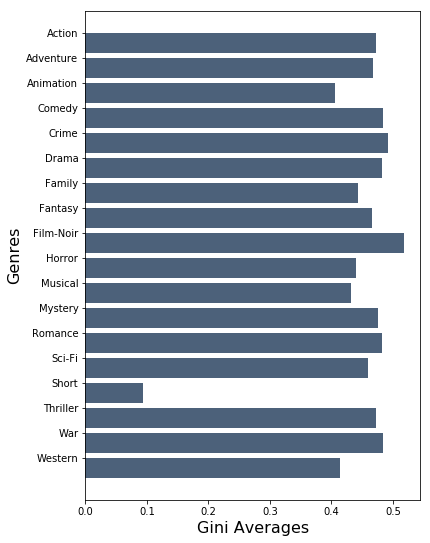

In [52]:
import matplotlib.pyplot as plt

%matplotlib inline

final_table_two.barh("Genres", "Gini Averages")

## Gini vs. Time 
Next, we wanted to see what the Gini coefficients look like against time. Below is how we edited the given script dates to make them useable, and how we found the average Gini coefficient for each year. 

In [70]:
new_dates = []
for i in final_table.column('Script Date'):
    if ": " in i: 
        new_dates = np.append(new_dates, i.replace(": ", ""))
    else:
        new_dates = np.append(new_dates, i)

In [71]:
new_dates

array(['January 2001', 'nan', 'March 1975', 'nan', 'April 1985',
       'February 1998', 'nan', ' 1997', 'September 2000', 'May 2003',
       'May 1998', 'nan', 'March 1939', 'January 1976', 'nan', 'June 1997',
       'February 1989', 'nan', 'May 2009', 'March 2002', 'nan',
       'March 2000', 'April 2009', 'June 1998', 'nan', 'March 1996', 'nan',
       'nan', 'nan', ' 1986', 'May 2012', 'February 2004', 'nan',
       'April 2010', 'nan', 'May 1949', 'nan', 'nan', 'June 2002',
       'May 1997', 'nan', 'June 1979', 'nan', 'October 2004', 'nan', 'nan',
       'nan', 'nan', 'nan', 'nan', 'November 1986', 'May 2003',
       'March 1999', ' 1982', 'July 1985', 'February 2002', 'nan',
       'November 1998', 'October 1995', 'February 1972', 'December 1975',
       'March 2004', ' 1992', 'nan', 'nan', 'October 1999', 'March 1998',
       'nan', 'March 1988', 'June 2008', 'nan', 'June 1994',
       'December 2001', 'nan', 'nan', 'October 1996', 'June 2007', 'nan',
       'March 1962', 'July

In [72]:
better_dates = []
for i in new_dates:   
    if "January " in i: 
        better_dates = np.append(better_dates, i.replace('January ', ""))
    elif "February " in i: 
        better_dates = np.append(better_dates, i.replace("February ", ""))
    elif "March " in i: 
        better_dates = np.append(better_dates, i.replace("March ", ""))
    elif "April " in i: 
        better_dates = np.append(better_dates, i.replace("April ", ""))
    elif "May " in i: 
        better_dates = np.append(better_dates, i.replace("May ", ""))
    elif "June " in i: 
        better_dates = np.append(better_dates, i.replace("June ", ""))
    elif "July " in i: 
        better_dates = np.append(better_dates, i.replace("July ", ""))
    elif "August " in i: 
        better_dates = np.append(better_dates, i.replace("August ", ""))
    elif "September " in i: 
        better_dates = np.append(better_dates, i.replace("September ", ""))
    elif "October " in i: 
        better_dates = np.append(better_dates, i.replace("October ", ""))
    elif "November " in i: 
        better_dates = np.append(better_dates, i.replace("November ", ""))
    elif "December " in i: 
        better_dates = np.append(better_dates, i.replace("December ", ""))
    else:
        better_dates = np.append(better_dates, i)

In [73]:
corrected_dates = final_table.with_column("better dates", better_dates)
almost_finished = corrected_dates.where('better dates', are.not_containing('nan'))
int_dates = almost_finished.apply(int, 'better dates')
year_table = almost_finished.with_column('Year', int_dates).select('title', 'Genres', 'Gini', "Year")
year_table.show(5)

title,Genres,Gini,Year
Swordfish Script,Action;Thriller;,0.723088,2001
All the President's Men Script,Drama;Thriller;,0.692701,1975
"Fabulous Baker Boys, The Script",Drama;Romance;,0.681685,1985
Fight Club Script,Action;Drama;Thriller;,0.665366,1998
Tomorrow Never Dies Script,Action;Adventure;Thriller;,0.66181,1997


In [74]:
better_year = year_table.sort('Year')

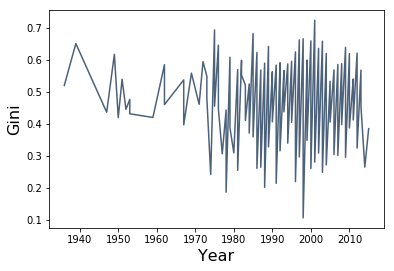

In [75]:
better_year.plot('Year', "Gini")

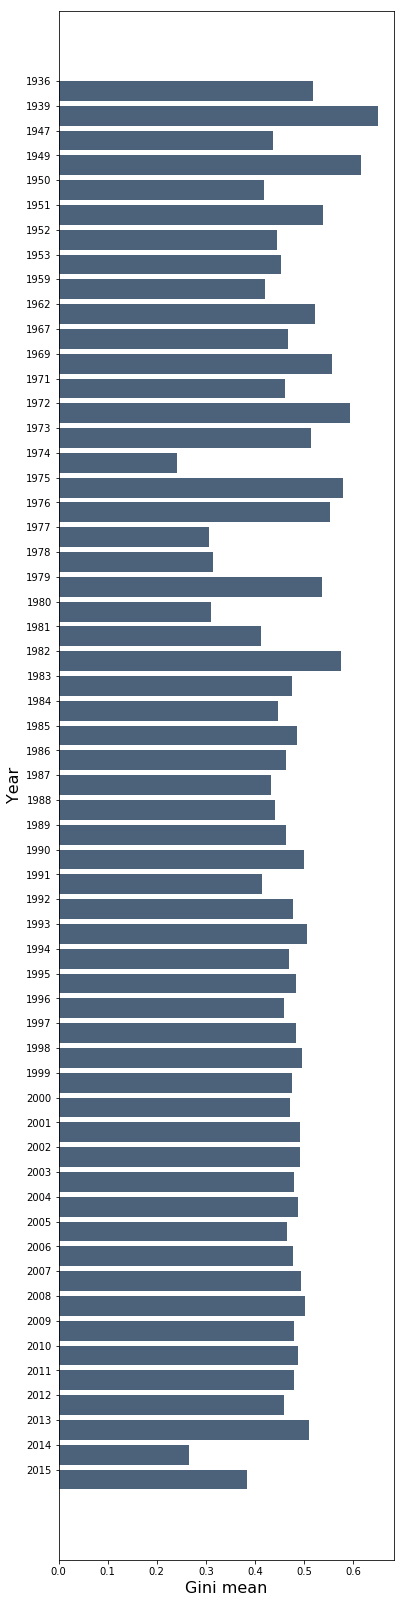

In [76]:
year_avg_gini = better_year.group("Year", collect=np.mean).select('Year', "Gini mean")
year_avg_gini.barh("Year", "Gini mean")

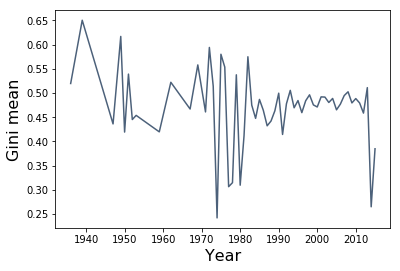

In [77]:
year_avg_gini.plot('Year')

## Average Gini for Decade 
Below, we broke the average Gini cofficients into decade long chunks, as the year long chunks above weren't very informative. 

In [78]:
int_and_str_years = almost_finished.with_column('Year', int_dates)
decades = ['193', '194', '195', '196', '197', '198', '199', '200', '201']
gini_by_decade = []

for i in decades:  
    avg_gini = np.mean(int_and_str_years.where('better dates', are.containing(i)).column('Gini'))
    gini_by_decade = np.append(gini_by_decade, avg_gini)

In [79]:
pretty_decades = [1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
decade_table = Table().with_column("Decade", pretty_decades).with_column("Average Gini for Decade", gini_by_decade)
decade_table

Decade,Average Gini for Decade
1930,0.58501
1940,0.526555
1950,0.455203
1960,0.507279
1970,0.494391
1980,0.453156
1990,0.476261
2000,0.486237
2010,0.467694


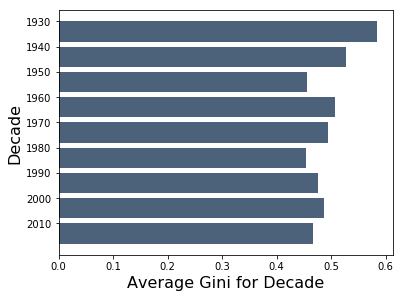

In [80]:
decade_table.barh('Decade')

(0.42, 0.6)

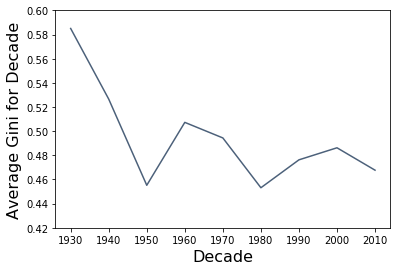

In [81]:
from pylab import *
decade_table.plot('Decade')
ylim([0.42,0.6])

This was the final information/visualization we used in our study! Our findings and interpretations can be read in each of our final essays. 